<a href="https://colab.research.google.com/github/Serra972/Pro115/blob/main/Class115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
data=files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [21]:
import pandas as pd
import plotly.express as px
df=pd.read_csv('escape_velocity.csv')
print(df)

    Velocity  Escaped
0       0.37        0
1      15.98        1
2       5.80        0
3      15.23        1
4      19.33        1
..       ...      ...
95     10.72        0
96     15.36        1
97      5.02        0
98      8.04        0
99     17.94        1

[100 rows x 2 columns]


In [22]:
score=df['Velocity'].tolist()
accepted=df['Escaped'].tolist()
graph=px.scatter(x=score,y=accepted)
graph.show()

In [23]:
import numpy as np 
score_array=np.array(score)
accepted_array=np.array(accepted)
m,c=np.polyfit(score_array , accepted_array,1)
y=[]
for x in score_array:
  y_value=m*x+c
  y.append(y_value)

graph=px.scatter(x=score_array,y=accepted_array)
graph.update_layout(shapes=[
            dict(
                type="line",y0=min(y),y1=max(y),x0=min(score_array),x1=max(score_array)
            )                
])

graph.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



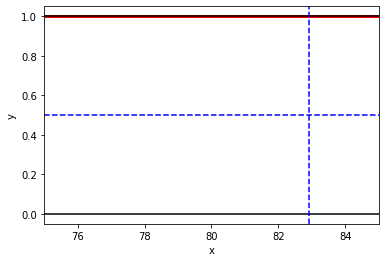

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X=np.reshape(score_array,(len(score_array),1))
Y=np.reshape(accepted_array,(len(accepted_array),1))
lr=LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color='black',zorder=20)
def model(x):
  return 1/(1+np.exp(-x))

X_test=np.linspace(0,100,200)
chances=model(X_test*lr.coef_+lr.intercept_).ravel()
plt.plot(X_test,chances,color='red',linewidth=3)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')
plt.axvline(x=X_test[165],color='b',linestyle='--')
plt.ylabel ('y')
plt.xlabel('x')
plt.xlim(75,85)
plt.show()

In [28]:
score=float(input('enter you velocity' ))
chances=model(score*lr.coef_+lr.intercept_).ravel()
if chances <=0.01:
  print('not escaped')
elif chances>=1:
  print('escaped')  
elif chances<0.5 :
  print('might not get escaped')


else:
   print ('might get escaped')






enter you marks20
might get escaped


In [ ]:
()